# Pseudo 3D - Willington
Comparing pseudo 3D and actual 3D inversion results for an example with minimal topography variations.
This example shows in cases where survey grid is simple, pseudo 3D and full 3D inversion bear very similar results whilst pseudo 3D runs in a matter of minutes compared to full 3D inversion which can take up to a few hours. Pseudo 3D benefits from parallel inversion capabilities of ResIPy in batch inversion.

- [ ] createMesh outputs too many stuff even if show_output=False
- [ ] import for createpseudo3D is done twice! not good, just create new instance and copy over data
- [ ] saveProject doesn't properly save pseudo3D survey

In [1]:
import sys
sys.path.append('../src')
from resipy import Project
import pyvista as pv
import time
timings = {}

API path =  /media/jkl/data/phd/tmp/resipy/src/resipy
ResIPy version =  3.2.3
cR2.exe found and up to date.
R3t.exe found and up to date.
cR3t.exe found and up to date.


<b><font color='red'>Pseudo 3D:</b>

In [2]:
t0 = time.time()
k = Project(typ='R2')

Working directory is: /media/jkl/data/phd/tmp/resipy/src/resipy
clearing dirname


In [3]:
k.createPseudo3DSurvey('paper3D_pseudo3D_full3D_Willington/Raw_data', 
                       lineSpacing=20, ftype='Sting')

8/32 imported

KeyboardInterrupt: 

In [6]:
k.importPseudo3DElec('paper3D_pseudo3D_full3D_Willington/electrodes3D.csv')

In [7]:
k.createMultiMesh(typ='trian', show_output=False, dump=None, runParallel=True)

Creating triangular mesh...done (2567 elements)
Creating triangular mesh...done (2565 elements)
Creating triangular mesh...done (2585 elements)
Creating triangular mesh...done (2581 elements)
Creating triangular mesh...done (2577 elements)
Creating triangular mesh...done (2565 elements)
Creating triangular mesh...done (2581 elements)
Creating triangular mesh...done (2589 elements)
Creating triangular mesh...done (2581 elements)
Creating triangular mesh...done (2627 elements)
Creating triangular mesh...done (2622 elements)
Creating triangular mesh...

KeyboardInterrupt: 

Converting `np.character` to a dtype is deprecated. The current result is `np.dtype(np.str_)` which is not strictly correct. Note that `np.character` is generally deprecated and 'S1' should be used.
Converting `np.character` to a dtype is deprecated. The current result is `np.dtype(np.str_)` which is not strictly correct. Note that `np.character` is generally deprecated and 'S1' should be used.


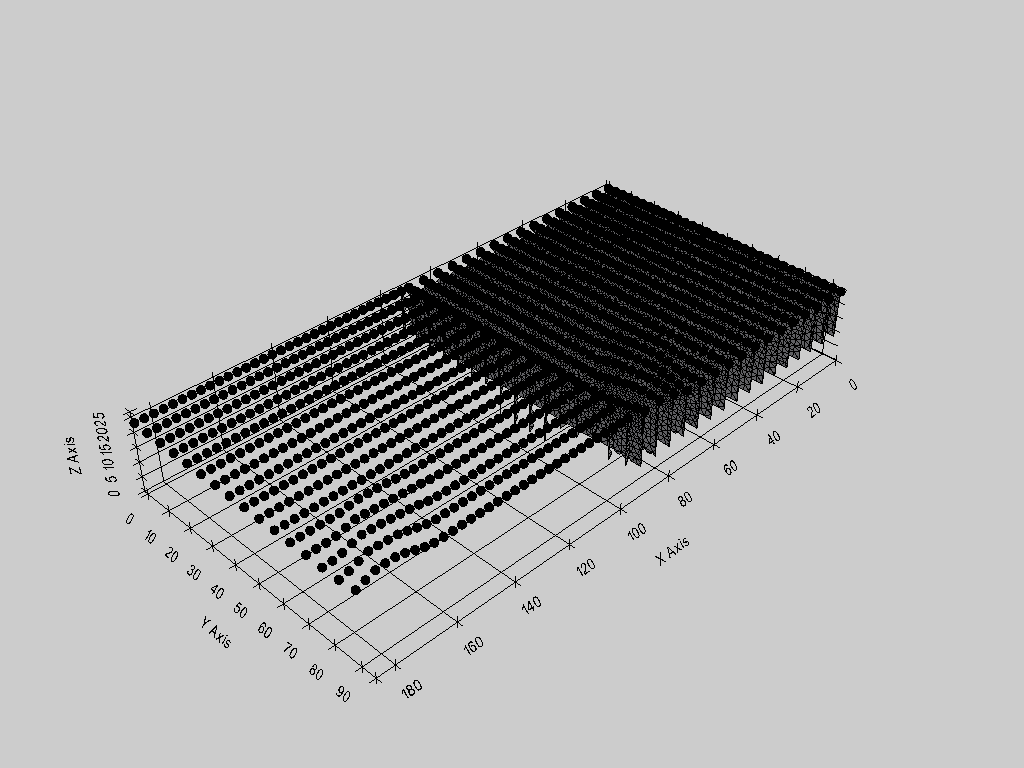

In [12]:
k.showPseudo3DMesh(cropMesh=True)

In [13]:
k.param['b_wgt'] = 0.05
k.invertPseudo3D(runParallel=True)

Writing .in file and protocol.dat for X00 survey... done!
Writing .in file and protocol.dat for X06 survey... done!
Writing .in file and protocol.dat for X12 survey... done!
Writing .in file and protocol.dat for X18 survey... done!
Writing .in file and protocol.dat for X24 survey... done!
Writing .in file and protocol.dat for X30 survey... done!
Writing .in file and protocol.dat for X36 survey... done!
Writing .in file and protocol.dat for X42 survey... done!
Writing .in file and protocol.dat for X48 survey... done!
Writing .in file and protocol.dat for X54 survey... done!
Writing .in file and protocol.dat for X60 survey... done!
Writing .in file and protocol.dat for X66 survey... done!
Writing .in file and protocol.dat for X72 survey... done!
Writing .in file and protocol.dat for X78 survey... done!
Writing .in file and protocol.dat for X84 survey... done!
Writing .in file and protocol.dat for X90 survey... done!
Writing .in file and protocol.dat for Y00 survey... done!
Writing .in fi

Converting `np.character` to a dtype is deprecated. The current result is `np.dtype(np.str_)` which is not strictly correct. Note that `np.character` is generally deprecated and 'S1' should be used.
Converting `np.character` to a dtype is deprecated. The current result is `np.dtype(np.str_)` which is not strictly correct. Note that `np.character` is generally deprecated and 'S1' should be used.


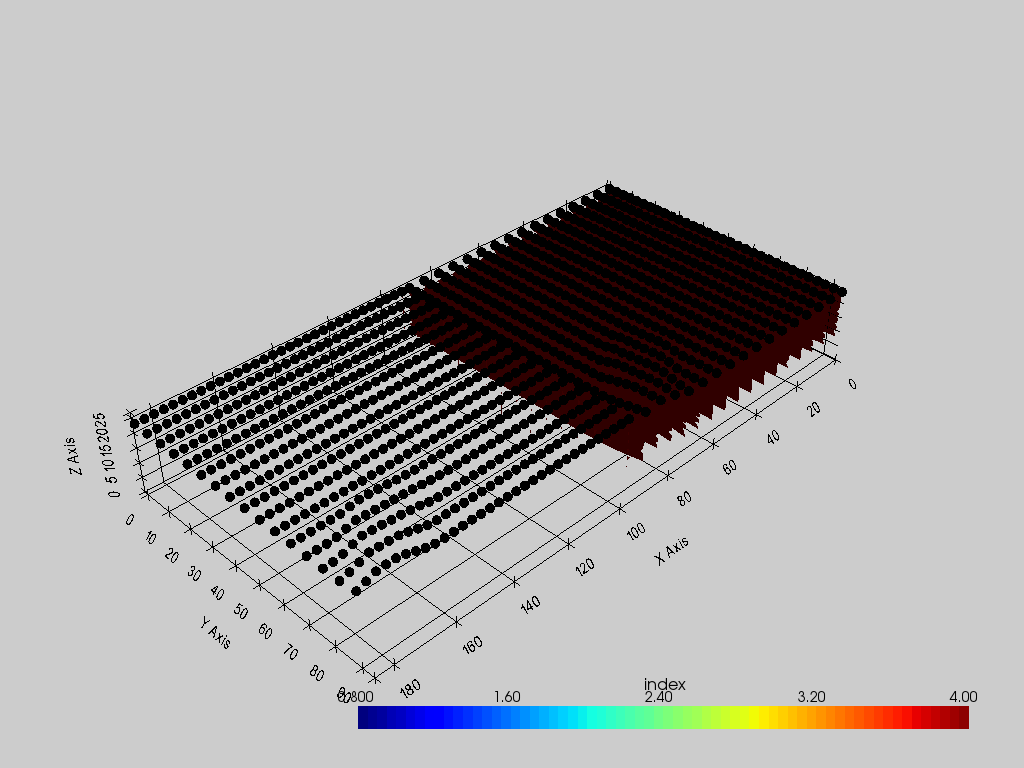

In [14]:
k.showResults(index=-1, cropMesh=True, color_map='jet', vmin=0.8, vmax=4)
timings['Pseudo 3D'] = time.time() - t0

In [9]:
k.saveProject(r'E:\Pseudo 3D Willington\Willington\JN_Pseudo3D_Willington.resipy')

<b><font color='red'>Full 3D:</b>

In [10]:
t1 = time.time()
m = Project(typ='R3t')

Working directory is: E:\resipy\src\resipy
clearing dirname


In [11]:
m.create3DSurvey(r'E:\Pseudo 3D Willington\Willington\Raw_data', 
                 lineSpacing=20, ftype='Sting')

712/712 reciprocal measurements found.
18 measurements error > 20 %
712/712 reciprocal measurements found.
60 measurements error > 20 %
712/712 reciprocal measurements found.
56 measurements error > 20 %
712/712 reciprocal measurements found.
8 measurements error > 20 %
712/712 reciprocal measurements found.
4 measurements error > 20 %
712/712 reciprocal measurements found.
32 measurements error > 20 %
602/657 reciprocal measurements found.
34 measurements error > 20 %
712/712 reciprocal measurements found.
2 measurements error > 20 %
712/712 reciprocal measurements found.
12 measurements error > 20 %
712/712 reciprocal measurements found.
4 measurements error > 20 %
712/712 reciprocal measurements found.
2 measurements error > 20 %
712/712 reciprocal measurements found.
4 measurements error > 20 %
712/712 reciprocal measurements found.
2 measurements error > 20 %
712/712 reciprocal measurements found.
4 measurements error > 20 %
680/696 reciprocal measurements found.
10 measurements e

In [12]:
m.importElec(r'E:\Pseudo 3D Willington\Willington\electrodes3D.csv')

merging electrodes positionned at the same location.


Creating tetrahedral mesh...fmd in gmshWrap.py: 25.000000
writing .geo to file completed, save location:
E:\resipy\src\resipy\invdir

Reading mesh3d.msh
Gmsh version == 3.x
reading node coordinates...
Determining element type...Tetrahedra
Reading connection matrix...
ignoring 26328 elements in the mesh file, as they are not required for R2/R3t
Finished reading .msh file
interpolating topography onto mesh using triangulate interpolation...done
Done
ResIPy Estimated RAM usage = 8.955804 Gb
done


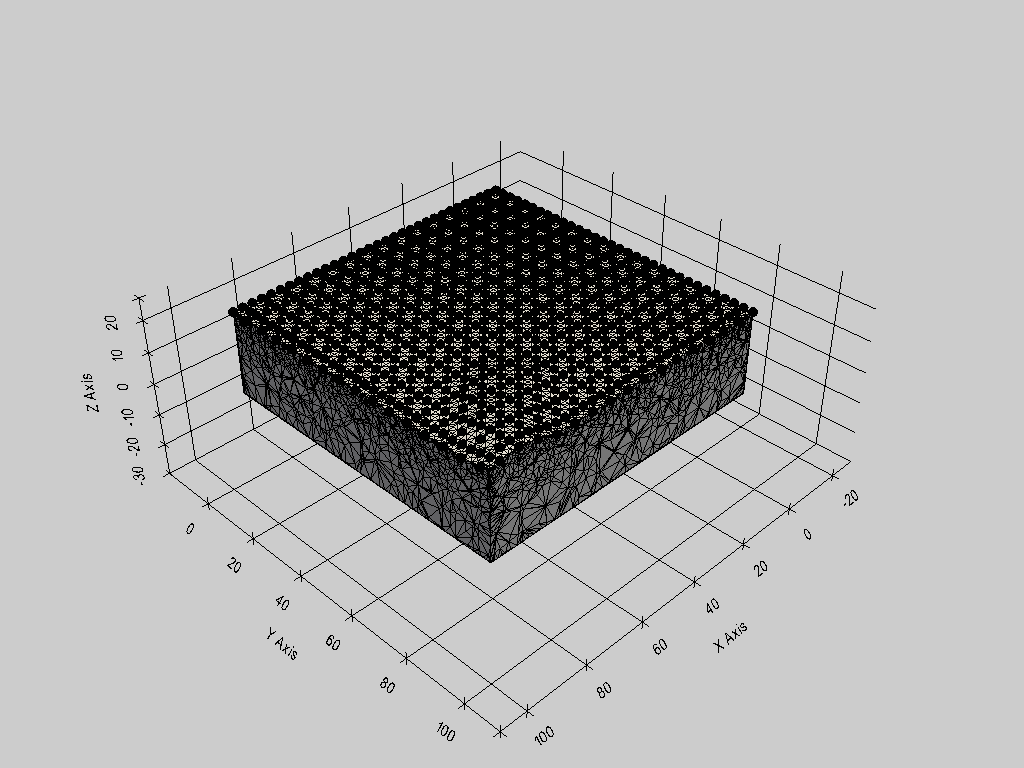

In [13]:
m.createMesh(typ='tetra', fmd=25, cl_factor=4, cl=1.5)
m.showMesh()

In [14]:
m.param['b_wgt'] = 0.05
def dump(x):
    pass
m.invert(dump=dump)

1/1 results parsed (1 ok; 0 failed)


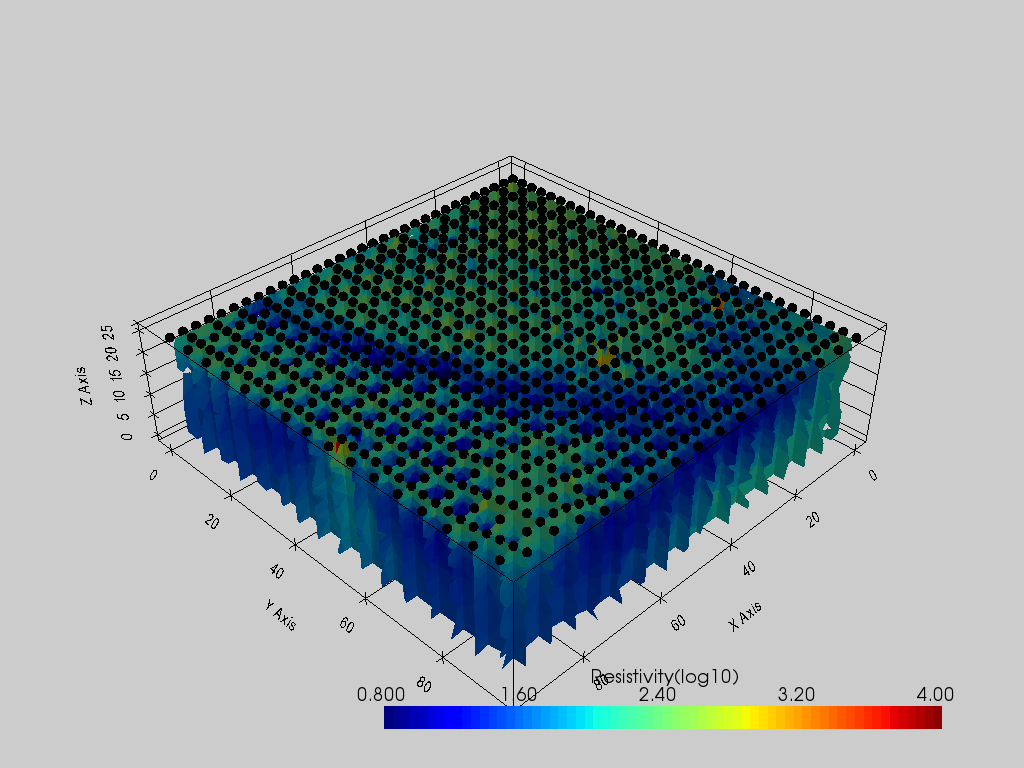

In [15]:
m.showResults(color_map='jet', vmin=0.8, vmax=4, pvslices=([1,6,12,18,24,30,36,42,48,54,60,66,72,78,84,90],
                                                           [1,6,12,18,24,30,36,42,48,54,60,66,72,78,84,90],
                                                           []))
timings['Full 3D'] = time.time() - t1

In [16]:
m.saveProject(r'E:\Pseudo 3D Willington\Willington\JN_Full3D_Willington.resipy')

# <b><i><font color='blue'>Timings:</i></b>

In [17]:
for key in timings.keys():
    print('{:s} : {:.2f}s'.format(key, timings[key]))

Pseudo 3D : 88.35s
Full 3D : 1454.27s


# Direct comparizon of Pseudo 3D and Full 3D results:
Clearly the results of both approaches are very similar. With Pseudo 3D approach being 18 times faster on this particular machine (AMD64 Family 23 Model 8 Stepping 2, AuthenticAMD, 16 Threads at <= 3700.0 Mhz, Total memory = 31.9 Gb)

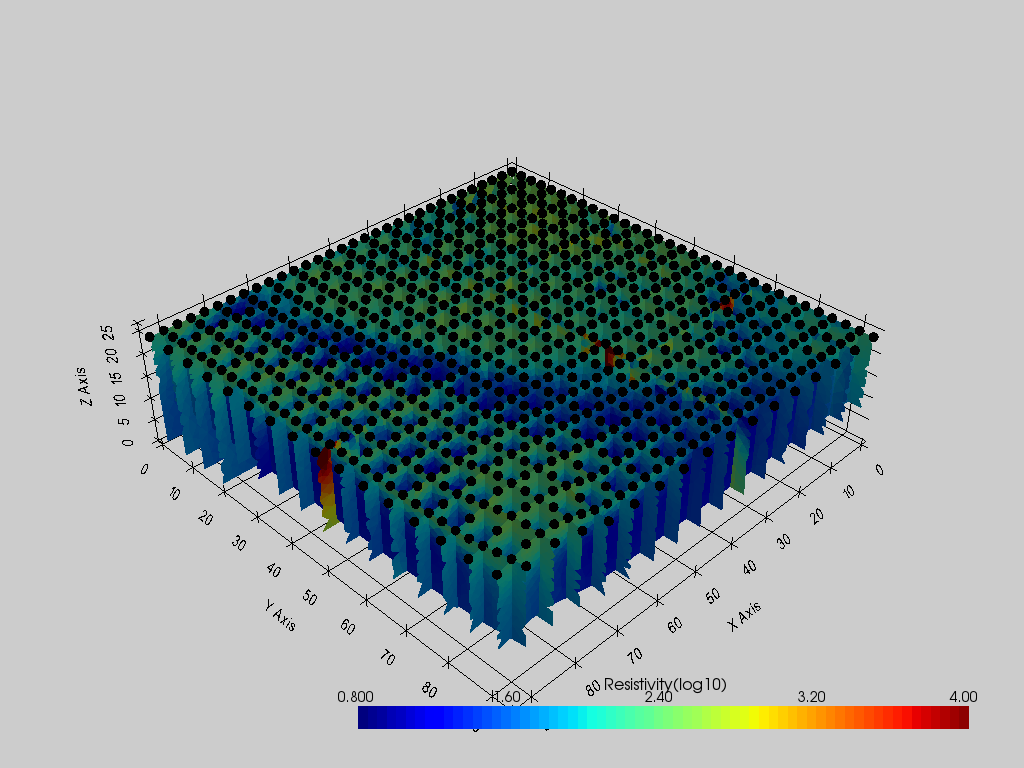

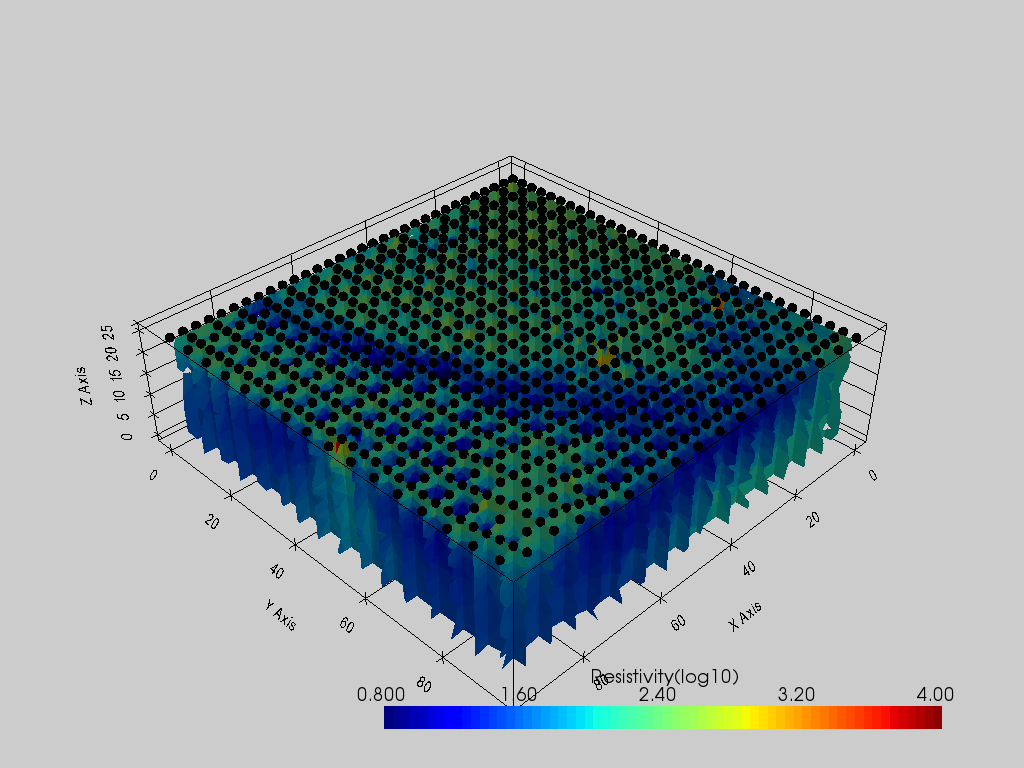

In [18]:
k.showResults(index=-1, cropMesh=True, color_map='jet', vmin=0.8, vmax=4)
m.showResults(color_map='jet', vmin=0.8, vmax=4, pvslices=([1,6,12,18,24,30,36,42,48,54,60,66,72,78,84,90],
                                                           [1,6,12,18,24,30,36,42,48,54,60,66,72,78,84,90],
                                                           []))

## Paper figure

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
kpseudo = Project(typ='R3t')
kpseudo.loadProject('paper3D_pseudo3D_full3D_Willington/JN_Pseudo3D_Willington.resipy')
# error on darkmode not in settings

kfull = Project(typ='R3t')
kfull.loadProject('paper3D_pseudo3D_full3D_Willington/JN_Full3D_Willington.resipy')

Working directory is: /media/jkl/data/phd/tmp/resipy/src/resipy
clearing dirname
912/912 reciprocal measurements found.
2 measurements error > 20 %
712/712 reciprocal measurements found.
60 measurements error > 20 %
680/696 reciprocal measurements found.
10 measurements error > 20 %
712/712 reciprocal measurements found.
0 measurements error > 20 %
712/712 reciprocal measurements found.
8 measurements error > 20 %
712/712 reciprocal measurements found.
4 measurements error > 20 %
712/712 reciprocal measurements found.
4 measurements error > 20 %
712/712 reciprocal measurements found.
12 measurements error > 20 %
712/712 reciprocal measurements found.
8 measurements error > 20 %
712/712 reciprocal measurements found.
18 measurements error > 20 %
712/712 reciprocal measurements found.
4 measurements error > 20 %
712/712 reciprocal measurements found.
0 measurements error > 20 %
712/712 reciprocal measurements found.
14 measurements error > 20 %
712/712 reciprocal measurements found.
54 m

Converting `np.character` to a dtype is deprecated. The current result is `np.dtype(np.str_)` which is not strictly correct. Note that `np.character` is generally deprecated and 'S1' should be used.
Converting `np.character` to a dtype is deprecated. The current result is `np.dtype(np.str_)` which is not strictly correct. Note that `np.character` is generally deprecated and 'S1' should be used.


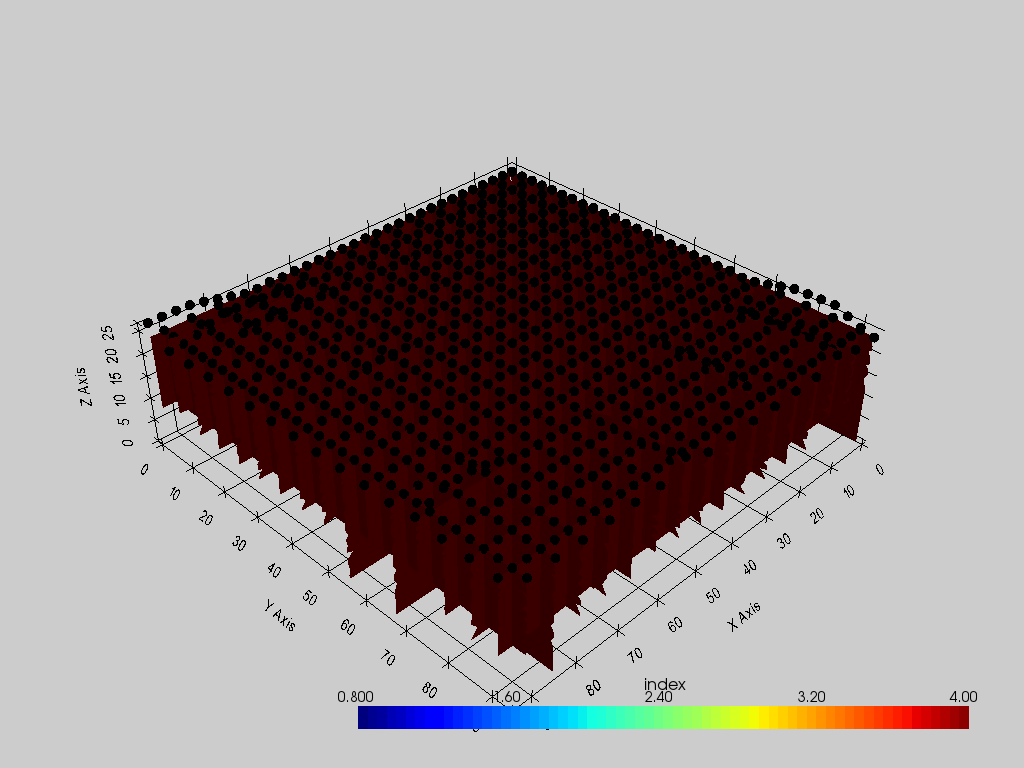

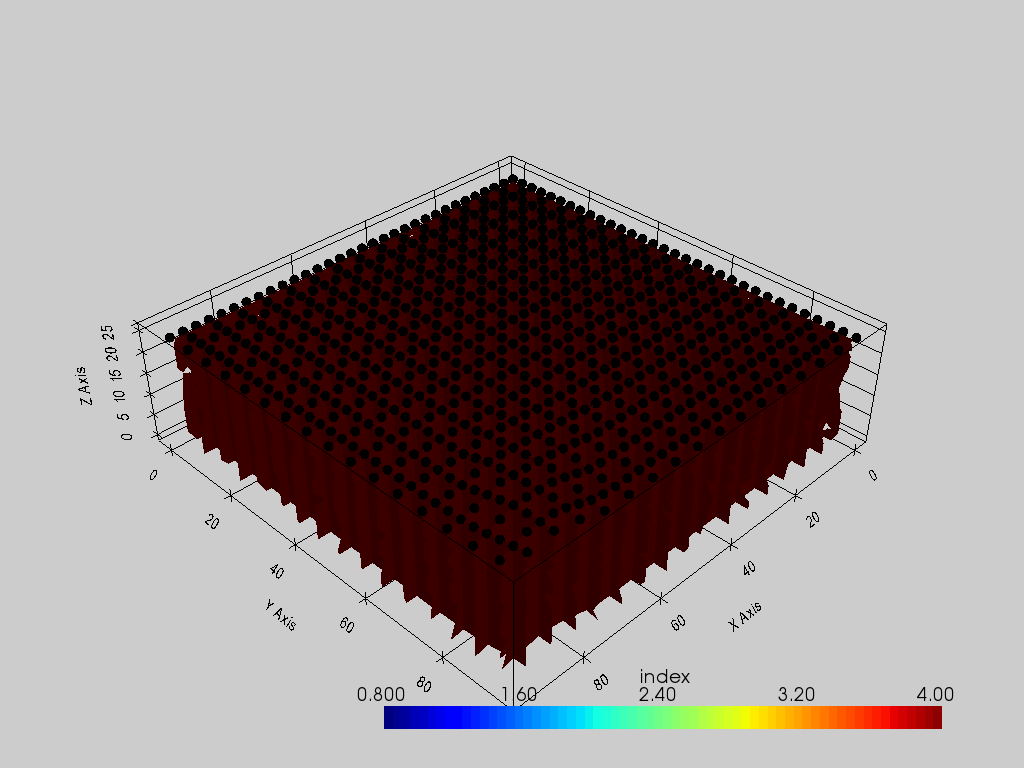

In [6]:
kpseudo.showResults(index=-1, attr='Resistivity(log10)', cropMesh=True, color_map='jet', vmin=0.8, vmax=4)
kfull.showResults(color_map='jet', vmin=0.8, vmax=4, pvslices=([1,6,12,18,24,30,36,42,48,54,60,66,72,78,84,90],
                                                           [1,6,12,18,24,30,36,42,48,54,60,66,72,78,84,90],
                                                           []))

In [7]:
kpseudo.meshResults[0].df.columns

Index(['param', 'elm_id', 'region', 'cellType', 'X', 'Y', 'Z',
       'Resistivity(ohm.m)', 'Resistivity(log10)', 'Sensitivity(log10)',
       'Conductivity(mS/m)'],
      dtype='object')

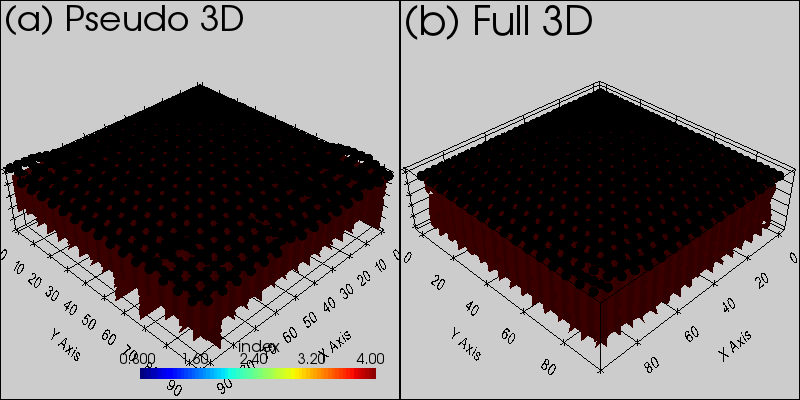

[(208.76491586266724, 208.4495618730661, 174.9679999286383),
 (46.414312958717346, 46.09895896911621, 12.617397024688415),
 (0.0, 0.0, 1.0)]

In [6]:
pl = pv.Plotter(shape=(1,2), window_size=[800, 400])
pl.subplot(0,0)
pl.add_text('(a) Pseudo 3D', color='k') # add timing?
kpseudo.showResults(ax=pl, index=-1, cropMesh=True, color_map='jet',
                    vmin=0.8, vmax=4, pvshow=False)
pl.subplot(0,1)
pl.add_text('(b) Full 3D', color='k')
kfull.showResults(ax=pl, color_map='jet', vmin=0.8, vmax=4, pvshow=False,
                  pvslices=([1,6,12,18,24,30,36,42,48,54,60,66,72,78,84,90],
                            [1,6,12,18,24,30,36,42,48,54,60,66,72,78,84,90],
                            []))
pl.show()

In [29]:
# trick to save a high resolution screenshot (basically render off screen)
# need to be executed before pl.show() so that the Plotter is not closed
hsize = 2000
pl.ren_win.OffScreenRenderingOn()
pl.enable_anti_aliasing()
pl.screenshot('../src/image/paper3d/mesh-types.jpg', transparent_background=False,
              window_size=[hsize, int(hsize*pl.window_size[1]/pl.window_size[0])])
pl.ren_win.SetSize([1000, 800])
pl.ren_win.OffScreenRenderingOff()
pl.ren_win.Render()
# NOTE pl.show() doesn't work after that